In [13]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)
df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':1 ,'B':0})
print(df.shape)
print(df)

(569, 32)
           ID  Diagnosis  radius  texture  perimeter    area  smoothness  \
0      842302          1   17.99    10.38     122.80  1001.0     0.11840   
1      842517          1   20.57    17.77     132.90  1326.0     0.08474   
2    84300903          1   19.69    21.25     130.00  1203.0     0.10960   
3    84348301          1   11.42    20.38      77.58   386.1     0.14250   
4    84358402          1   20.29    14.34     135.10  1297.0     0.10030   
..        ...        ...     ...      ...        ...     ...         ...   
564    926424          1   21.56    22.39     142.00  1479.0     0.11100   
565    926682          1   20.13    28.25     131.20  1261.0     0.09780   
566    926954          1   16.60    28.08     108.30   858.1     0.08455   
567    927241          1   20.60    29.33     140.10  1265.0     0.11780   
568     92751          0    7.76    24.54      47.92   181.0     0.05263   

     compactness  concavity  concave_points  ...  radius_MAX  texture_MAX  \


In [11]:
X = df.to_numpy()[:, 2:]
x = StandardScaler().fit_transform(X)
normDF = pd.DataFrame(x,columns=cols[2:])
print(normDF)

       radius   texture  perimeter      area  smoothness  compactness  \
0    1.097064 -2.073335   1.269934  0.984375    1.568466     3.283515   
1    1.829821 -0.353632   1.685955  1.908708   -0.826962    -0.487072   
2    1.579888  0.456187   1.566503  1.558884    0.942210     1.052926   
3   -0.768909  0.253732  -0.592687 -0.764464    3.283553     3.402909   
4    1.750297 -1.151816   1.776573  1.826229    0.280372     0.539340   
..        ...       ...        ...       ...         ...          ...   
564  2.110995  0.721473   2.060786  2.343856    1.041842     0.219060   
565  1.704854  2.085134   1.615931  1.723842    0.102458    -0.017833   
566  0.702284  2.045574   0.672676  0.577953   -0.840484    -0.038680   
567  1.838341  2.336457   1.982524  1.735218    1.525767     3.272144   
568 -1.808401  1.221792  -1.814389 -1.347789   -3.112085    -1.150752   

     concavity  concave_points  symmetry  fractal_dimension  ...  radius_MAX  \
0     2.652874        2.532475  2.217515   

In [17]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
print(principal_breast_Df)
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


     principal component 1  principal component 2
0                 9.192837               1.948583
1                 2.387802              -3.768172
2                 5.733896              -1.075174
3                 7.122953              10.275589
4                 3.935302              -1.948072
..                     ...                    ...
564               6.439315              -3.576817
565               3.793382              -3.584048
566               1.256179              -1.902297
567              10.374794               1.672010
568              -5.475243              -0.670637

[569 rows x 2 columns]
Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

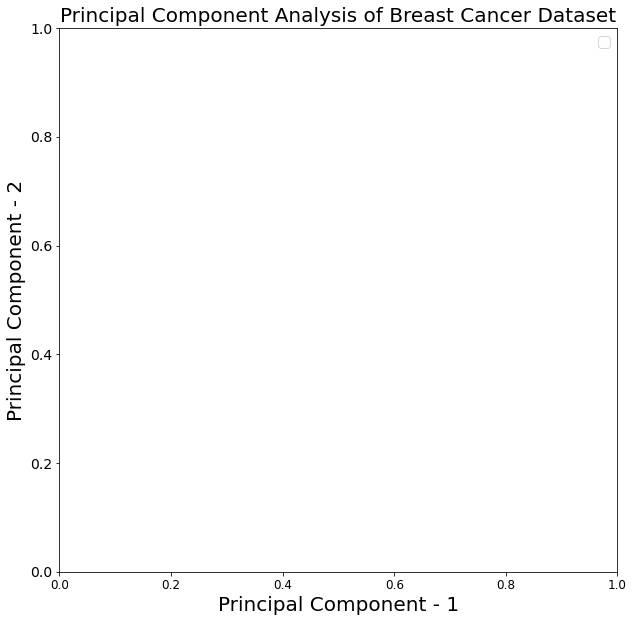

In [21]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['0', '1']
colors = ['r', 'g']
'''for target, color in zip(targets,colors):
    indicesToKeep = df['Diagnosis'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
'''
plt.legend(targets,prop={'size': 15})